# Ensemble methods

## Single Classifier vs Bagging vs Boosting

In [1]:
from sklearn.datasets import load_wine

load_wine()

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [28]:
from sklearn.datasets import load_wine
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier

wine = load_wine()
X, y = wine.data, wine.target
random_state = 1

base_estimator = DecisionTreeClassifier(min_samples_leaf=3, max_depth=1, max_features=3, random_state=random_state)

# Initialize classifiers
decision_tree = DecisionTreeClassifier(min_samples_leaf=3,max_features=3,  random_state=random_state)
bagged_tree = BaggingClassifier(base_estimator=base_estimator, n_estimators=100, random_state=random_state)
adaboost = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=100, algorithm='SAMME', random_state=random_state)
gradient_boosting = GradientBoostingClassifier(n_estimators=100, min_samples_leaf=3,learning_rate=1.0, subsample=0.5, max_depth=1, random_state=random_state)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)

decision_tree_accuracy = cross_val_score(decision_tree, X, y, cv=cv, scoring='accuracy').mean()
bagged_tree_accuracy = cross_val_score(bagged_tree, X, y, cv=cv, scoring='accuracy').mean()
adaboost_accuracy = cross_val_score(adaboost, X, y, cv=cv, scoring='accuracy').mean()
gradient_boosting_accuracy = cross_val_score(gradient_boosting, X, y, cv=cv, scoring='accuracy').mean()
# Print results
print("Average Accuracy:")
print("Single Decision Tree:", decision_tree_accuracy)
print("Bagged Decision Tree:", bagged_tree_accuracy)
print("AdaBoost:", adaboost_accuracy)
print("Gradient Boosting:", gradient_boosting_accuracy)
print(base_estimator.get_params())

Average Accuracy:
Single Decision Tree: 0.8987301587301587
Bagged Decision Tree: 0.9552380952380952
AdaBoost: 0.9777777777777779
Gradient Boosting: 0.818095238095238
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 1, 'max_features': 3, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 3, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 1, 'splitter': 'best'}


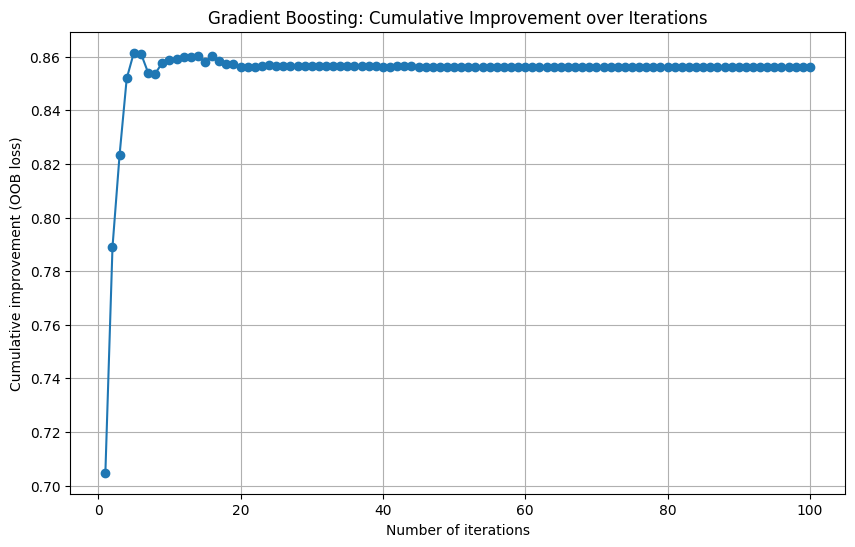

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.ensemble import GradientBoostingClassifier

# Load the wine dataset
wine = load_wine()
X, y = wine.data, wine.target

# Initialize Gradient Boosting classifier
gradient_boosting = GradientBoostingClassifier(n_estimators=100, min_samples_leaf=3,learning_rate=1.0, subsample=0.5, max_depth=1, random_state=random_state)

# Fit the model on the whole dataset
gradient_boosting.fit(X, y)

# Compute cumulative improvement (OOB loss)
cumulative_improvement = np.cumsum(gradient_boosting.oob_improvement_)

# Prepare plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_improvement) + 1), cumulative_improvement, marker='o', linestyle='-')
plt.xlabel('Number of iterations')
plt.ylabel('Cumulative improvement (OOB loss)')
plt.title('Gradient Boosting: Cumulative Improvement over Iterations')
plt.grid(True)
plt.show()